# Realtor.com Dataset:

## Business Case:

This dataset can be used to understand historical trends in US Housing data which can be leveraged to project future pricing. Further, the dataset could be used to compare a house which is for sale with what the market is pricing comparable sales too. This allows homeowners and investors to make more educated decisions with regards to real estate purchases.

USA Real Estate Dataset  is a 12 feature 900,000+ entry dataset of the Real Estate transactions and the properties on the market for various markets across the United States. The dataset is collected from a weekly web scrape of the Realtor.com website which is one of the US’ most popular provider of real estate data and has historical data going back to 1980s.

The business model of a real estate flipper is to purchase a property which is in a below market state, renovate that property, and then sell that property at a price which covers the initial purchase price and renovations. For this business model to succeed, the flipper needs to have an accurate After Repair Value (ARV) which is the fair market value of the property when the repairs are completed. To get the ARV, the flipper needs to project both what the fair market value of the house if it were repaired and the way in which the market will change between now and the time in which renovation finishes. Due to the locality of the real estate market, trends in the national housing market cannot accurately indicate what will happen to the value of houses in different price ranges and markets. As a result, to get a good indication of ARV comparison with comparable sales must be conducted. Our dataset allows for a programmatic determination of ARV by using comparable sales and by finding market trends amongst those sales.


## Threashold


The threshold for this tool being valuable is whether or not it provides a better estimation than human evaluators.


### Importing Relevant Libraries:

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [46]:
df = pd.read_csv("realtor-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


## Understanding the data:

In [47]:
df.head(10)

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN
5,for_sale,179000.0,4.0,3.0,0.46,"Bo Calabazas San Sebastian, San Sebastian, PR,...",Bo Calabazas San Sebastian,San Sebastian,Puerto Rico,612.0,2520.0,NaN
6,for_sale,50000.0,3.0,1.0,0.20,"49.1 140, Ciales, PR, 00639",49.1 140,Ciales,Puerto Rico,639.0,2040.0,NaN
7,for_sale,71600.0,3.0,2.0,0.08,"3467 St, Ponce, PR, 00731",3467 St,Ponce,Puerto Rico,731.0,1050.0,NaN
8,for_sale,100000.0,2.0,1.0,0.09,"230 Rio De Vida, Ponce, PR, 00730",230 Rio De Vida,Ponce,Puerto Rico,730.0,1092.0,NaN
9,for_sale,300000.0,5.0,3.0,7.46,"Pr 120 Bo Maravilla Sur K M # 335, Las Marias,...",Pr 120 Bo Maravilla Sur K M # 335,Las Marias,Puerto Rico,670.0,5403.0,NaN


TODO For each of the following:

appropriately define data types. What data type should be used to represent each data attribute? Discuss the attributes collected in the dataset. For datasets with a large number of attributes, only discuss a subset of relevant attributes.

Verify data quality: Explain any missing values or duplicate data. Visualize entries that are missing/complete for different attributes. Are those mistakes? Why do these quality issues exist in the data? How do you deal with these problems? Give justifications for your methods (elimination or imputation).


### status: Saaketh

The status feature tells whether the given listing was for_sale or ready_to_build. This feature should be one-hot encoded. Because there are only two values for status, we will only the ready_to_build column. After the transformation, the status column will be replaced with a read_to_build column. We would expect the featture to be encoded as an object in pandas, which is what it is.

In [48]:
df.status.value_counts()

for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

In [49]:
"Number of missing values: " +   str(df.status.isna().sum())

'Number of missing values: 0'

Only 1,631 out of the 923,159 listings were labeled as ready_to_build

OneHotEncoding the ready_to_build column
We will also drop the original column after one hot encoding.

In [50]:
df["ready_to_build"] = pd.get_dummies(df.status).ready_to_build
df.drop(columns=["status"], inplace=True)

### price: Ray

Price is feature which we are trying to predict. The price feature is the value at which is the house has sold for. Price is a float because it is a numeric value.

First we should see if there are any missing price data...

In [ ]:
"Number of missing values: " +   str(df.price.isna().sum())

Because all of the other metrics (square footage, number of baths, number of bedrooms) are used to predict price, if the price value is missing the data for that entry is not of any value and should be dropped as a result.

In [ ]:
df.dropna(subset=['price'], inplace=True)

Now that we have dropped all of the null values, let's look at the distribution of the price data.

In [ ]:
sns.histplot(data=df, x="price", kde=True, bins=50000,kde_kws={'clip' : (0, 1500000)})
plt.xlim(0, 1500000)
print("The mean is: " + str(df['price'].mean()))
print("The standard deviation is: " + str(df['price'].std()))

As the histogram shows, the distribution of price data is unimodal with a left skew.

### bed: Vedant
#The bed column gives a count of the number of bedrooms in a given property, the value is an integer but is stored as a float in pandas, I have a suspicion that this means there are some missing values.

In [ ]:
df.info()

In [ ]:
#As suspected, we have a lot of missing values, over 12000, but this is only about 13% of our dataset so we can just drop the missing rows, as there is stilla a lot of useful information in this feature.
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

# External package: conda install missingno
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["bed"]))
plt.title("Sorted",fontsize=22)

From this visual, it seems that the missing values of bed are also highly indicative of missing values in bath(# bathrooms), house size and sold date. That honestly doesn't give much confidence that imputation would actually work super well with this dataset for either of those features (as they are hightly correlated to each other) so lets just drop the missing columns of bed.

(array([     0.,  84911., 172977., 247049., 149127.,  59084.,  36391.,
         12483.,  10250.,   8281.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

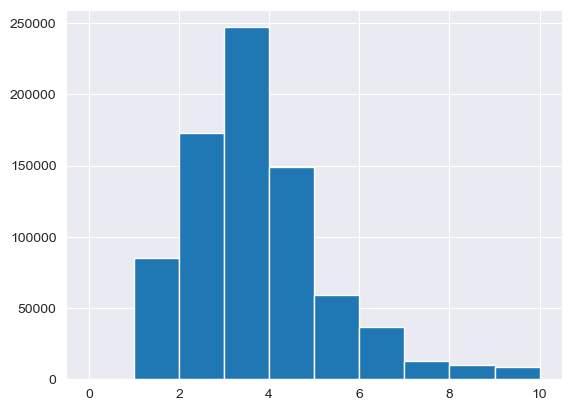

In [56]:
plt.hist(data=df, x="bed", bins=[0,1,2,3,4,5,6,7,8,9,10])

As can be seen by the histogram of beds, the most common house has somewhere between 3-5 beds with anymore or less being less common. The high rate of two bedroom properties are likely condominiums in urban areas.

In [ ]:
df.dropna(subset=['bed'], inplace=True)

#

### bath: Saaketh

This variable describes the number of bathrooms in the property. The data should be in Integer form, but it pandas stores it as a float, indicating missing values.

In [42]:
txt = "{percent:.2f}% of the data is missing"
print(txt.format(percent=(df.bath.isna().sum()*100) / len(df)))

0.00% of the data is missing


(array([     0., 184678., 282163., 190664.,  71173.,  27686.,  13682.,
          6250.,   4042.,   3467.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

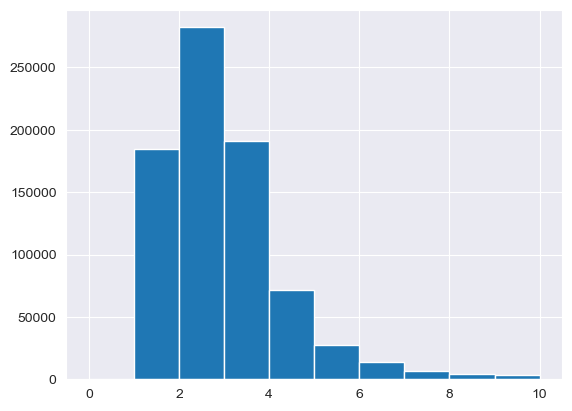

In [57]:
plt.hist(data=df, x="bath", bins=[0,1,2,3,4,5,6,7,8,9,10])

Because 0.65% of the data is missing, lets just drop the missing rows.

Interestingly enough, the data for bath is a lot more tightly distributed between 1 and 4, indicating that more people are sharing bathrooms, which makes intutive sense.

In [41]:
df.dropna(subset=['bath'], axis=1, inplace=True)

KeyError: ['bath']

### acre_lot

#### Overview
The acre_lot feature indicates the lot size of the property being sold. This feature is different from the house size metric as that measures the size of the property itself rather than the land around it. While this difference is often negligible in urban areas, for rural properties, the Lot Size of the land often drives the value of the property more than the value of the dwelling. The variable type of acre lot is float because it represents a non-discrete numeric value.

#### Missing Values
The first questions is what percentage of the data does not have a acre_lot value.

In [ ]:
str(int((df.acre_lot.isna().sum())/ len(df) * 100)) + "% do not have acre_lot"

If we dropped all attributes that do not have an acre_lot value then about 1/3 of the data would be lost. This is a signifigant loss of data which could reduce the ability for our model to predict the value of price. To mitigate this, we will try to see if imputing this data is a wise decision and if it is, we will impute it.

If acre lot can mostly be predicted from another feature than imputing it is a good idea. One canidate for this is house size. House size measures the amount of square feet within the house. As a general rule, houses with larger interiors should have larger exteriors. To test to see if this is a valid presumption, we'll generate a scatter plot of the data comparing these two features to see if a linearity exists.

In [ ]:
sns.regplot(df,x="house_size",y="acre_lot",fit_reg=True)
plt.xlim(0, 20000)
plt.ylim(0,2.50)

As the scatter plot shows, all of the points are bunched on the left side of the plot. As a result, we cannot have faith in the regression model which would be produced. Due to the high importance of acre_lot to determine the value of a property, we will be dropping all of the entries that do not have a acre_lot value.

In [ ]:
df.dropna(subset=['acre_lot'], inplace=True)

# full_address: Vedant
The data type for this is object
Because we already have zip code and other useful geolocation data, the full address isn't all that relevant to us, as the full address itself doesn't inherently provide more information to us than zip code, unless we wanted to somehow map the addresses to precise places via a gps, which would likely be extremely expensive and beyond the scope of what we can realistically do, given our current limitations.

In [ ]:
#dropping the address feature
df.drop(labels=['full_address'], axis=1, inplace=True)

### street: Saaketh
Street has around 2000 missing values and isn't all that useful for our analysis, so we will drop it.

In [ ]:
df.street.isna().sum()

In [ ]:
df.drop(labels=['street'], axis=1, inplace=True])

### city: Ray

The city indicates the city in which the property is located. The value of city is an object in pandas (string). This is feature allows us to determine the market which the property is located and to use that property's price data to make market predictions

In [ ]:
df.city.isna().sum()

As we can see from the above snipit, all entries that remain in the dataframe have a city feature. As a result, we do not need to change the dataframe.

In [ ]:
df.city.value_counts()

The top two values for city are New York and New York City which refer to the same location. Further, there are various cities that have a small number of properties located in them.

### state: Vedant

State is encoded as an object (string) in pandas, which is what it should be.

In [ ]:
df.state.isna().sum()

There are no missing values for state and it is useful for the purposes of mapping, dicretizing the data by state, etc.

In [ ]:
df.state.value_counts()

In [ ]:
#dropping virgin islands because it only has 6 instances and is therefore not all that useful
df = df[df.state.isin(["Virgin Islands"]) == False]

### zip_code: Saaketh

In the US, a Zip Code is 5 digits. Any entries in the zip code feature that have less than 5 digits have leading 0s in their official zipcode.
Zip code has been stored as a float by pandas, indicating missing values.

In [ ]:
df.zip_code.min(), df.zip_code.max()

In [ ]:
df.zip_code.isna().sum(), (df.zip_code.isna().sum()*100)/len(df)

There are only 205 NaN values for the zip_code feature. These account for ~0.02% of the dataset. For this reason, we will eliminate the NaN values. If we had more NaN values, we could impute by taking the mode zipcode grouped by city. This is using the logic that a single zipcode covers most of the city.

In [ ]:
df.dropna(subset=["zip_code"], inplace=True)

<AxesSubplot:xlabel='zip_code', ylabel='Count'>

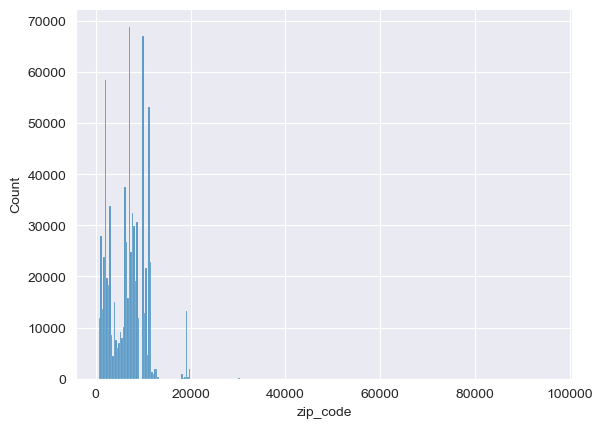

In [40]:
sns.histplot(data=df, x="zip_code", bins=300)

As seen by this histogram, there is a clear disequitable distribution between the ranges of zipcodes that appear, indicating many parts of the country are not covered, and the dataset is [highly regional](https://upload.wikimedia.org/wikipedia/commons/2/24/ZIP_Code_zones.svg)  (specifically, the northeast).

### sold_date: Saaketh

Sold date has about 362,000 missing values, isn't really something we can impute due to the fact that there are a very high number of sold dates in our dataset and there is no real notion that the nearest neighborhoods across some feature will have similar dates due to a missing one. However, this feature is very important for us in terms of understanding shifts over time, so we will just drop rows with missing values.

In [ ]:
df["sold_date"] = pd.to_datetime(df["sold_date"])
df.sold_date.isna().sum()
df.dropna(subset=['sold_date'], inplace=True)

In [ ]:
df["sold_date"] = pd.to_datetime(df["sold_date"])

## Data Visualization:

TODO: Ask three interesting questions that are relevant to your dataset and explore visuals that help answer these questions. Use whichever visualization method is appropriate for your data
Visualize basic feature distributions. That is, plot the dynamic range and exploratory distribution plots (like boxplots, histograms, kernel density estimation) to better understand the data. Describe anything meaningful or potentially useful you discover from these visualizations. These may also help to understand what data is missing or needs imputation. Note: You can also use data from other sources to bolster visualizations. Visualize at least five plots, at least one categorical.


We will each do 2 plots

Question ideas:


How do house prices vary by location?
How do house prices vary by size / features of the house?
How have house prices changed over time?
How have house features changed over time? (ie have bedrooms / bathrooms increased in number, sqft increased or decreased, ect.)

In [ ]:
# plot the correlation matrix
vars_to_use = ['bed', 'bath', 'acre_lot', 'house_size', 'price'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

### How do house prices vary by location? Saaketh

In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
import datetime as dt

I am getting the values from 2011 onwards in order to keep the prices relatively recent.

In [ ]:
df['sold_date'] = pd.to_datetime(df["sold_date"])

In [ ]:
states_df = df[df.sold_date > dt.datetime(2011,1,1)].groupby("state").mean()

In [ ]:
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

In [ ]:

states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
def label_state_id(row):
    try:
        state_id = states_to_number[row.name]
    except:
        return 0
    return state_id
states_df["state_id"] = states_df.apply(label_state_id, axis=1)

In [ ]:
px.choropleth(states_df,
              locations= states_df.state_id,
              geojson=states,
              color='price',
              color_continuous_scale="Viridis",
              range_color=(300000, 1500000),
              scope="usa",
              labels={'unemp':'unemployment rate'},
              title="Average sold house price since 2011 by state"
              )

Since 2011 the state of New York has had the highest average house prices of all the other states in our dataset.

In [ ]:
recent_sold_homes = df[df.sold_date > dt.datetime(2011,1,1)]

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state", title="Distribution of sold home prices by state")
fig.show()

Most states have a uni-modal distribution in their house prices. Georgia has a bi-modal distribution but only has 36 data points after 2011. New Hampshire's price distribution is more tightly concentrated compared to that of New York's price distribution. New York has more spread in the prices than other states in the dataset.

### Question 2: Ray
In what ways is the housing market localized?

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state")
fig.show()

In [ ]:
import plotly.express as px
from urllib.request import urlopen
import json
import datetime as dt

I am getting the values from 2011 onwards in order to keep the prices relatively recent.

In [ ]:
df['sold_date'] = pd.to_datetime(df["sold_date"])

In [ ]:
states_df = df[df.sold_date > dt.datetime(2011,1,1)].groupby("state").mean()

In [ ]:
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

In [ ]:

states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
def label_state_id(row):
    try:
        state_id = states_to_number[row.name]
    except:
        return 0
    return state_id
states_df["state_id"] = states_df.apply(label_state_id, axis=1)

In [ ]:
px.choropleth(states_df,
              locations= states_df.state_id,
              geojson=states,
              color='price',
              color_continuous_scale="Viridis",
              range_color=(300000, 1500000),
              scope="usa",
              labels={'unemp':'unemployment rate'},
              title="Average sold house price since 2011 by state"
              )

Since 2011 the state of New York has had the highest average house prices of all the other states in our dataset.

In [ ]:
recent_sold_homes = df[df.sold_date > dt.datetime(2011,1,1)]

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state", title="Distribution of sold home prices by state")
fig.show()

Most states have a uni-modal distribution in their house prices. Georgia has a bi-modal distribution but only has 36 data points after 2011. New Hampshire's price distribution is more tightly concentrated compared to that of New York's price distribution. New York has more spread in the prices than other states in the dataset.

### Question 2: Ray
In what ways is the housing market localized?

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state")
fig.show()

### How do house prices vary by location? Saaketh

In [76]:
import plotly.express as px
from urllib.request import urlopen
import json
import datetime as dt

ModuleNotFoundError: No module named 'plotly'

I am getting the values from 2011 onwards in order to keep the prices relatively recent.

In [ ]:
df['sold_date'] = pd.to_datetime(df["sold_date"])

In [ ]:
states_df = df[df.sold_date > dt.datetime(2011,1,1)].groupby("state").mean()

In [ ]:
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

In [ ]:

states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
states_to_number = {
    # State_name :  state id
}

for state in states["features"]:
    state_name = state["properties"]["name"]
    state_id = state["id"]

    states_to_number[state_name] = state_id

In [ ]:
def label_state_id(row):
    try:
        state_id = states_to_number[row.name]
    except:
        return 0
    return state_id
states_df["state_id"] = states_df.apply(label_state_id, axis=1)

In [ ]:
px.choropleth(states_df,
              locations= states_df.state_id,
              geojson=states,
              color='price',
              color_continuous_scale="Viridis",
              range_color=(300000, 1500000),
              scope="usa",
              labels={'unemp':'unemployment rate'},
              title="Average sold house price since 2011 by state"
              )

Since 2011 the state of New York has had the highest average house prices of all the other states in our dataset.

In [ ]:
recent_sold_homes = df[df.sold_date > dt.datetime(2011,1,1)]

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state", title="Distribution of sold home prices by state")
fig.show()

Most states have a uni-modal distribution in their house prices. Georgia has a bi-modal distribution but only has 36 data points after 2011. New Hampshire's price distribution is more tightly concentrated compared to that of New York's price distribution. New York has more spread in the prices than other states in the dataset.

### Question 2: Ray
In what ways is the housing market localized?

In [ ]:
fig = px.violin(recent_sold_homes, x="price", animation_frame="state")
fig.show()